In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [2]:
path = "Flight_on_time_HIX.csv"
df = pd.read_csv("Flight_on_time_HIX.csv")
df.head(2)

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,Departure_Taxi,Departure_WheelsOff,Scheduled_Arrival_Time,Actual_Arrival_Time,Arrival_Delay_Minutes,Arrival_Taxi,Arrival_WheelsOn,Delay_Reason
0,TR,4135,GJLOAB,12/1/2019,IYF,HIX,678,1,103,62,15,118,127,219,52,7,212,LateAircraft
1,TR,3776,GDISCI,12/1/2019,HEN,HIX,1700,10,25,15,21,46,616,624,8,27,557,NaN


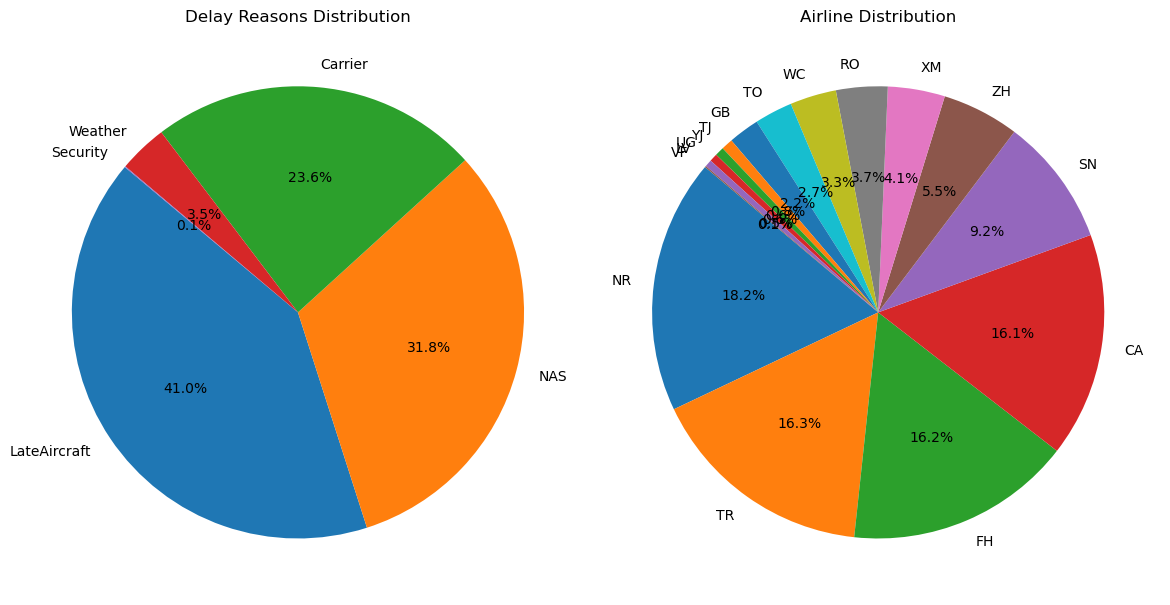

In [3]:
# Assuming you have a DataFrame df with columns "Delay_Reason" and "Airline"
delay_reasons = df["Delay_Reason"]
airlines = df["Airline"]

# Count the occurrences of each delay reason
delay_reason_counts = delay_reasons.value_counts()

# Count the occurrences of each airline
airline_counts = airlines.value_counts()

# Create a pie chart for delay reasons
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(delay_reason_counts.values, labels=delay_reason_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Delay Reasons Distribution")

# Create a pie chart for airlines
plt.subplot(1, 2, 2)
plt.pie(airline_counts.values, labels=airline_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Airline Distribution")

plt.tight_layout()
plt.show()

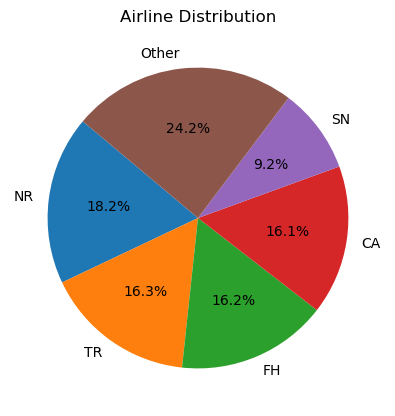

In [12]:
# Calculate the percentage of each airline
airline_percentages = (airline_counts / airline_counts.sum()) * 100

# Group airlines with less than 9% into an "Other" category
threshold = 9
other_airlines = airline_percentages[airline_percentages < threshold]
other_count = other_airlines.sum()
airline_percentages = airline_percentages[airline_percentages >= threshold]
airline_percentages['Other'] = other_count

# Create a pie chart for airlines
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 2)
plt.pie(airline_percentages.values, labels=airline_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title("Airline Distribution")

plt.tight_layout()
plt.show()


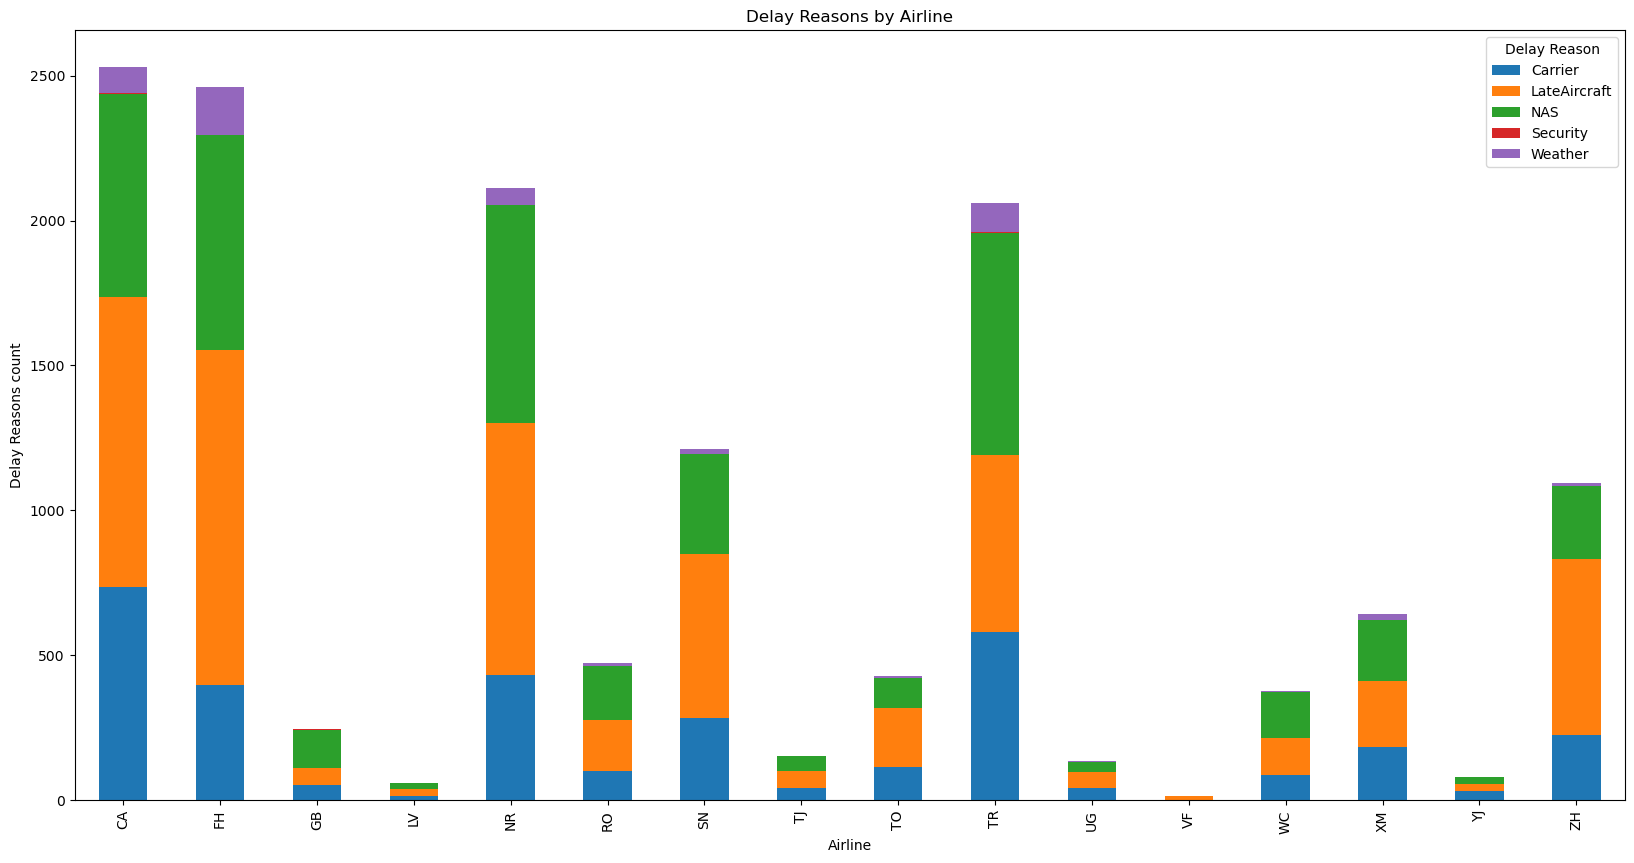

In [5]:
# Count occurrences of delay reasons for each airline and remove all null values. 
delay_reason_counts = df.groupby(["Airline", "Delay_Reason"]).size().unstack(fill_value=0)

# Plot the multi bar graph
x_values = delay_reason_counts.plot(kind="bar", stacked=True, figsize=(20, 10))

plt.xlabel("Airline")
plt.ylabel("Delay Reasons count")
plt.title("Delay Reasons by Airline")
plt.legend(title="Delay Reason")

# Customize x-axis ticks to show only the airlines
x_values.set_xticks(range(len(delay_reason_counts.index)))
x_values.set_xticklabels(delay_reason_counts.index)

plt.show()


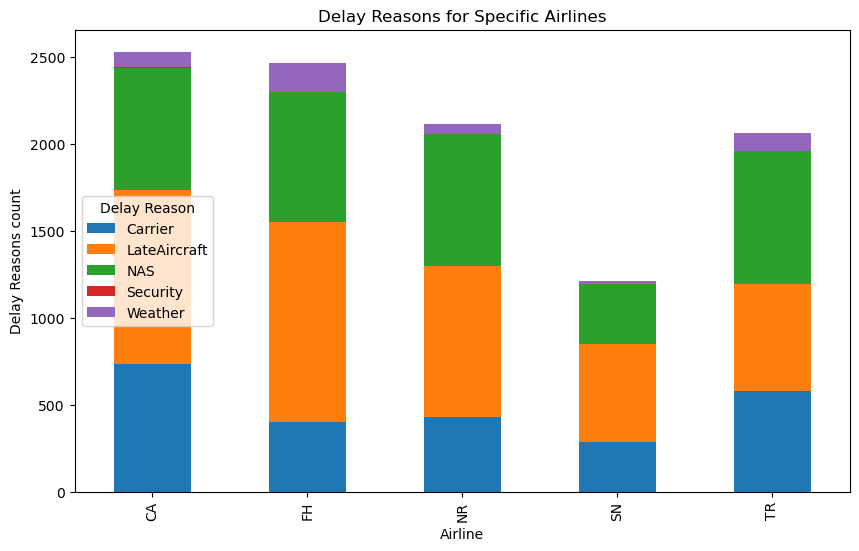

Looking through the selected airlines it seems that CA and FH perform the worst by looking at delay counts.
Despite being tracked more than CA and FH. TR has the less amounts of delays comparatively


In [6]:
# Regraph into selecting specific airlines 
top_airlines = ["FH", "CA", "NR", "TR", "SN"]

# Confirm the airlines
specific_airline_data = df[df['Airline'].isin(top_airlines)]
specific_airline_delay_reason_counts = specific_airline_data.groupby(['Airline', 'Delay_Reason']).size().unstack(fill_value=0)

# Graph the new graph
specific_airlines = specific_airline_delay_reason_counts.plot(kind="bar", stacked=True, figsize=(10, 6))

plt.xlabel("Airline")
plt.ylabel("Delay Reasons count")
plt.title("Delay Reasons for Specific Airlines")
plt.legend(title="Delay Reason")

# Customize x-axis ticks to show only the airlines
specific_airlines.set_xticks(range(len(specific_airline_delay_reason_counts.index)))
specific_airlines.set_xticklabels(specific_airline_delay_reason_counts.index)

plt.show()

print("Looking through the selected airlines it seems that CA and FH perform the worst by looking at delay counts.")
print("Despite being tracked more than CA and FH. TR has the less amounts of delays comparatively")

-------Now calculate the total mean delay in minutes for the arrival and departure.------

In [7]:
# Create column names
arrival_delay_column = 'Arrival_Delay_Minutes'
departure_delay_column = 'Departure_Delay_Minutes'

# Filter rows where both Arrival_Delay_Minutes and Departure_Delay_Minutes are not 0
filtered_df = df[(df[arrival_delay_column] != 0) & (df[departure_delay_column] != 0)]

# Group by 'Airline' and calculate the mean of delays for each airline
grouped_df = filtered_df.groupby('Airline').agg({
    arrival_delay_column: ['mean'],
    departure_delay_column: ['mean']
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['Airline', 'Mean_Arrival_Delay', 'Mean_Departure_Delay']

# Convert mean columns to integers
grouped_df['Mean_Arrival_Delay'] = grouped_df['Mean_Arrival_Delay'].astype(int)
grouped_df['Mean_Departure_Delay'] = grouped_df['Mean_Departure_Delay'].astype(int)

# Display the cleaned and grouped DataFrame
grouped_df.head()

,Airline,Mean_Arrival_Delay,Mean_Departure_Delay
0,CA,1728,83
1,FH,969,53
2,GB,4250,53
3,LV,45,51
4,NR,821,52


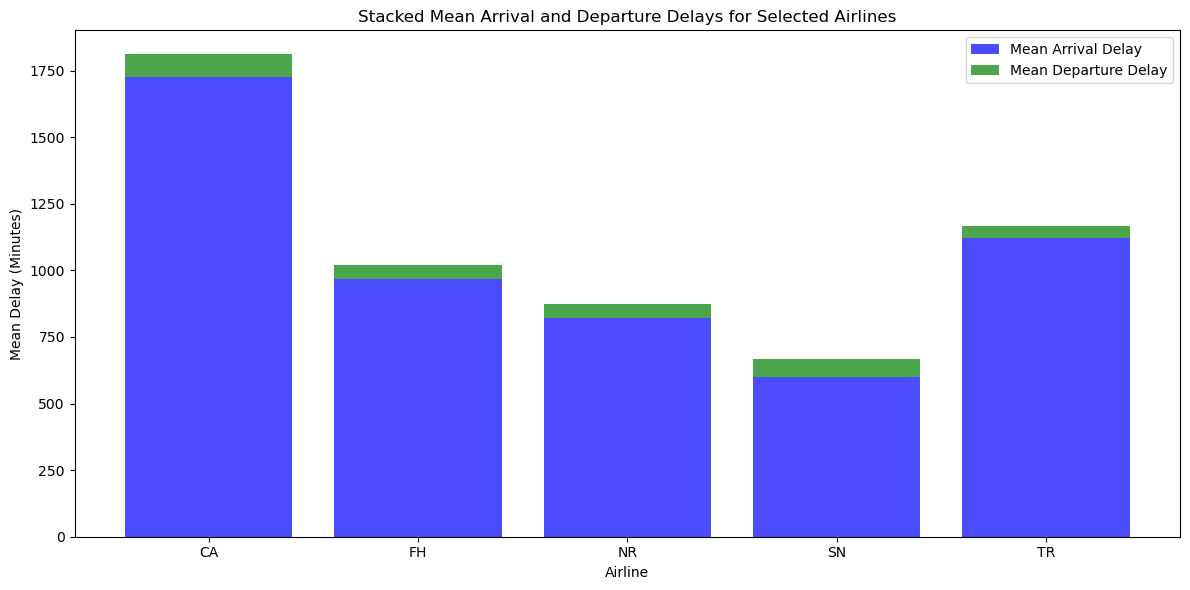

Note that this result is with outliers inclduded in the data


In [8]:
# Select only the desired airlines
selected_airlines = ["FH", "CA", "NR", "TR", "SN"]
filtered_grouped_df = grouped_df[grouped_df['Airline'].isin(selected_airlines)]

# Create a stacked bar chart for Mean Arrival and Departure Delays
plt.figure(figsize=(12, 6))
bar_positions = range(len(filtered_grouped_df))

plt.bar(bar_positions, filtered_grouped_df['Mean_Arrival_Delay'], label='Mean Arrival Delay', color='b', alpha=0.7)
plt.bar(bar_positions, filtered_grouped_df['Mean_Departure_Delay'], bottom=filtered_grouped_df['Mean_Arrival_Delay'], label='Mean Departure Delay', color='g', alpha=0.7)

# Add labels and a legend
plt.xlabel('Airline')
plt.ylabel('Mean Delay (Minutes)')
plt.title('Stacked Mean Arrival and Departure Delays for Selected Airlines')
plt.xticks(bar_positions, filtered_grouped_df['Airline'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

print("Note that this result is with outliers inclduded in the data")

In [9]:
# Create the column names
arrival_delay_column = 'Arrival_Delay_Minutes'
departure_delay_column = 'Departure_Delay_Minutes'

# Filter rows where both Arrival_Delay_Minutes and Departure_Delay_Minutes are not 0
filtered_df = df[(df[arrival_delay_column] != 0) & (df[departure_delay_column] != 0)]

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(df, column_name, threshold=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from 'Your_Arrival_Delay_Column' and 'Your_Departure_Delay_Column'
filtered_df = remove_outliers_iqr(filtered_df, arrival_delay_column)
filtered_df = remove_outliers_iqr(filtered_df, departure_delay_column)

# Group by 'Airline' and calculate the mean of delays for each airline
grouped_df = filtered_df.groupby('Airline').agg({
    arrival_delay_column: ['mean'],
    departure_delay_column: ['mean']
}).reset_index()

# Rename columns for clarity
grouped_df.columns = ['Airline', 'Mean_Arrival_Delay', 'Mean_Departure_Delay']

# Convert mean columns to integers
grouped_df['Mean_Arrival_Delay'] = grouped_df['Mean_Arrival_Delay'].astype(int)
grouped_df['Mean_Departure_Delay'] = grouped_df['Mean_Departure_Delay'].astype(int)

# Display the cleaned and grouped DataFrame
grouped_df.head()


,Airline,Mean_Arrival_Delay,Mean_Departure_Delay
0,CA,39,40
1,FH,39,37
2,GB,31,35
3,LV,34,40
4,NR,33,35


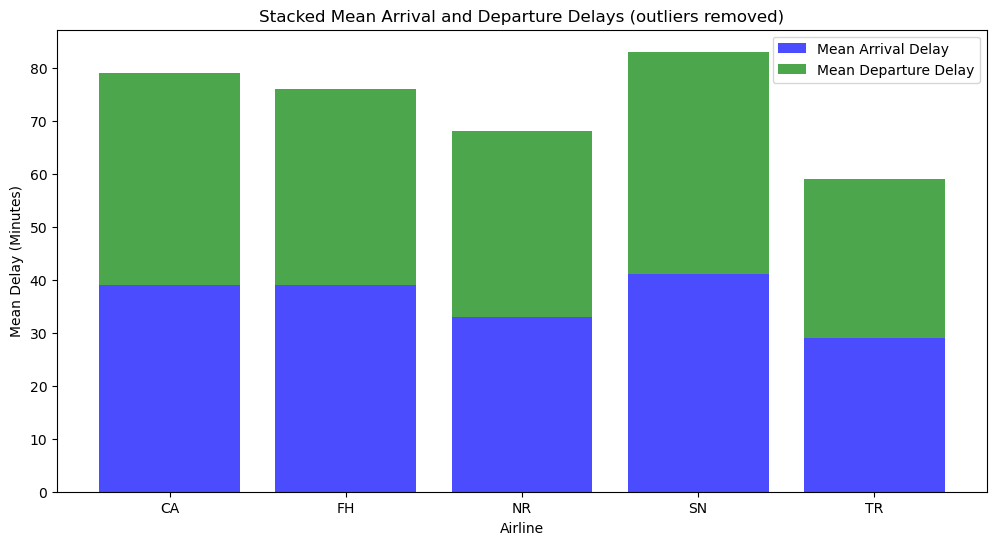

Results when outliers are removed


In [10]:
# Selected airlines
selected_airlines = ["FH", "CA", "NR", "TR", "SN"]

# Filter the DataFrame to include only selected airlines
filtered_grouped_df = grouped_df[grouped_df['Airline'].isin(selected_airlines)]

plt.figure(figsize=(12, 6))
bar_positions = range(len(filtered_grouped_df))

# Create a stacked bar chart for selected airlines
plt.bar(
    bar_positions, filtered_grouped_df['Mean_Arrival_Delay'], 
    label='Mean Arrival Delay', color='b', alpha=0.7
)

plt.bar(
    bar_positions, filtered_grouped_df['Mean_Departure_Delay'], 
    bottom=filtered_grouped_df['Mean_Arrival_Delay'], 
    label='Mean Departure Delay', color='g', alpha=0.7
)

# Add labels and a legend
plt.xlabel('Airline')
plt.ylabel('Mean Delay (Minutes)')
plt.title('Stacked Mean Arrival and Departure Delays (outliers removed)')
plt.xticks(bar_positions, filtered_grouped_df['Airline'])
plt.legend()

plt.show()

print("Results when outliers are removed")